In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Read the data files
walking_acc = pd.read_csv('../Kebutuhan/(Walking) 2025-11-04 16-11-45.csv')
running_acc = pd.read_csv('../Kebutuhan/(Running) 2025-11-04 16-15-33.csv')
walking_gyro = pd.read_csv('../Kebutuhan/Gyro_Walking.csv')
running_gyro = pd.read_csv('../Kebutuhan/Gyro_Running.csv')

In [2]:
# Function to resample data to a specific frequency
def resample_data(df, target_freq):
    # Calculate the time difference between samples
    time = df['Time (s)'].values
    dt = np.mean(np.diff(time))
    current_freq = 1/dt
    
    # Create a regular time index
    regular_time = np.arange(time[0], time[-1], 1/target_freq)
    
    # Interpolate the data to the new frequency
    resampled_data = {}
    for column in df.columns:
        if column != 'Time (s)':
            resampled_data[column] = np.interp(regular_time, time, df[column].values)
    
    resampled_df = pd.DataFrame(resampled_data)
    resampled_df['Time (s)'] = regular_time
    
    return resampled_df

# Function to plot signals with different sampling frequencies
def plot_signal(original_df, title, y_column, y_label):
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    fig.suptitle(title)
    
    # Resample data to 50Hz and 100Hz
    data_50hz = resample_data(original_df, 50)
    data_100hz = resample_data(original_df, 100)
    
    # Plot 50Hz data
    ax1.plot(data_50hz['Time (s)'], data_50hz[y_column])
    ax1.set_title(f'Sampling Frequency: 50 Hz')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    
    # Plot 100Hz data
    ax2.plot(data_100hz['Time (s)'], data_100hz[y_column])
    ax2.set_title(f'Sampling Frequency: 100 Hz')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

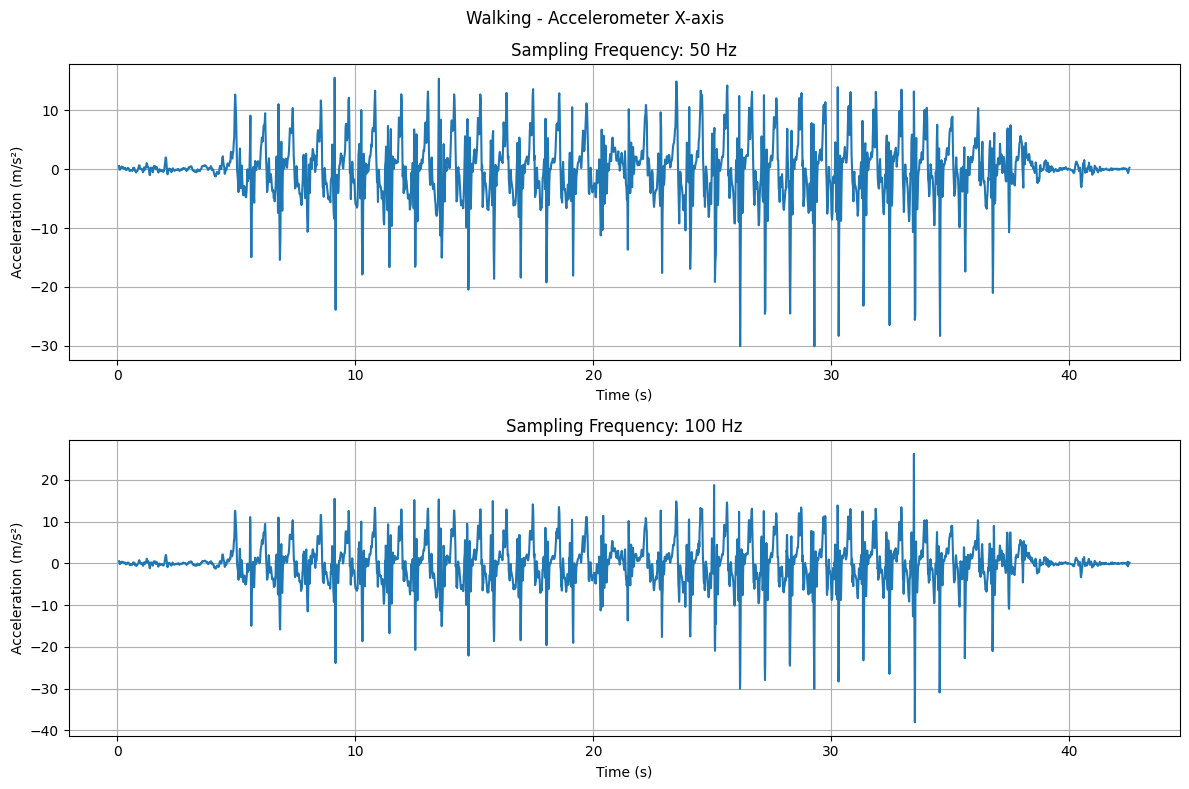

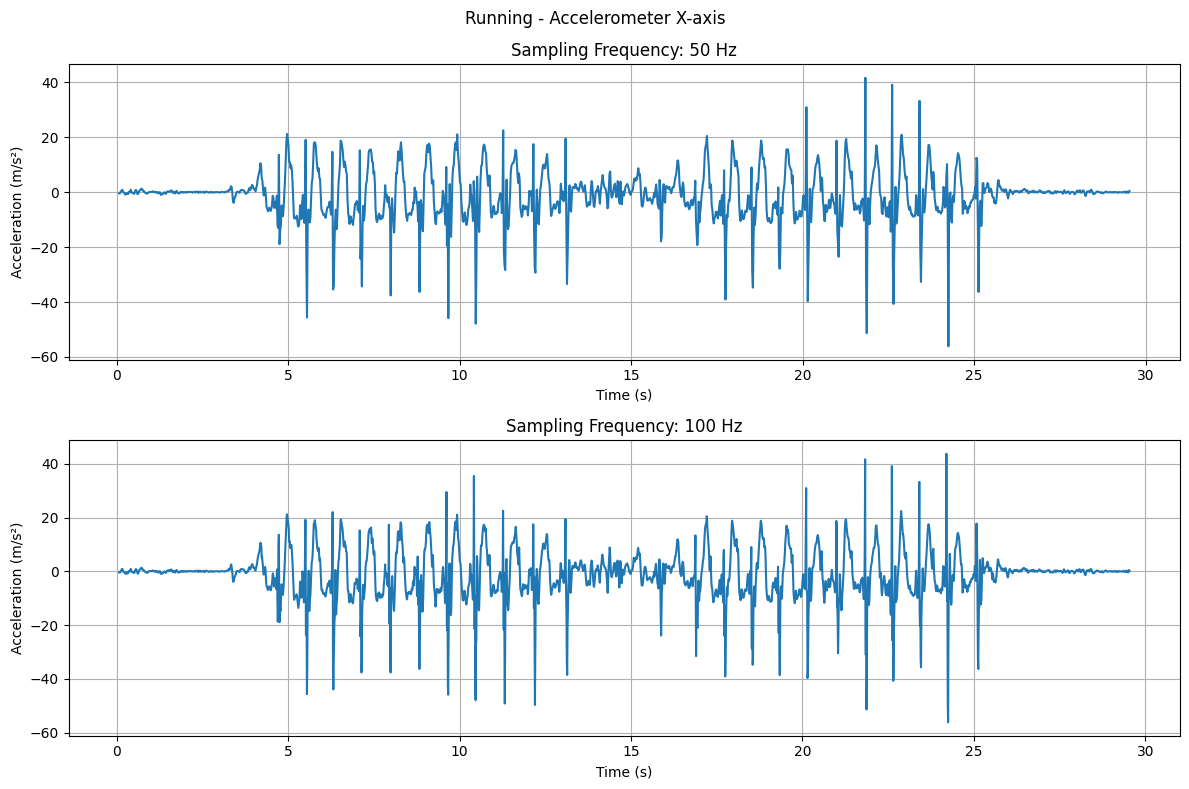

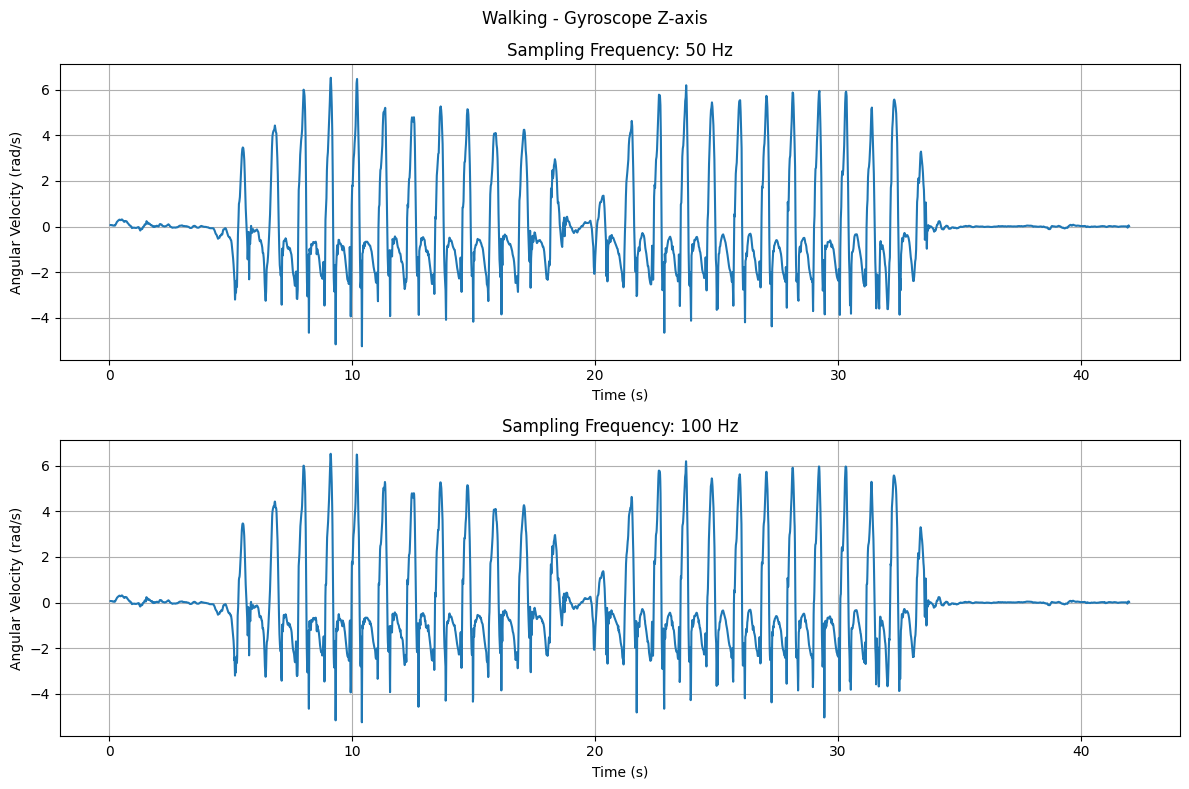

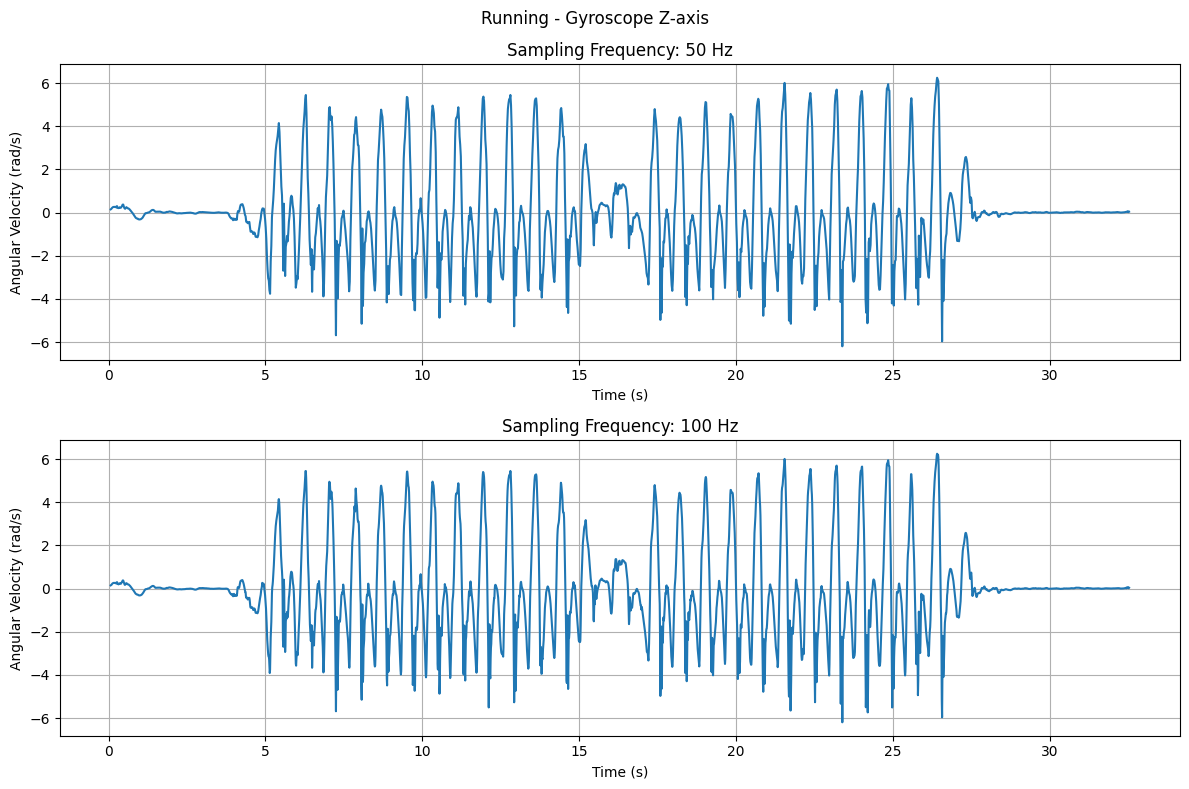

In [3]:
# 1. Plot accelerometer data for walking (X-axis)
plot_signal(walking_acc, 'Walking - Accelerometer X-axis', 
           'Linear Acceleration x (m/s^2)', 
           'Acceleration (m/s²)')

# 2. Plot accelerometer data for running (X-axis)
plot_signal(running_acc, 'Running - Accelerometer X-axis', 
           'Linear Acceleration x (m/s^2)', 
           'Acceleration (m/s²)')

# 3. Plot gyroscope data for walking (Z-axis)
plot_signal(walking_gyro, 'Walking - Gyroscope Z-axis', 
           'Gyroscope z (rad/s)', 
           'Angular Velocity (rad/s)')

# 4. Plot gyroscope data for running (Z-axis)
plot_signal(running_gyro, 'Running - Gyroscope Z-axis', 
           'Gyroscope z (rad/s)', 
           'Angular Velocity (rad/s)')